# FAKE NEWS PROJECT
There are two datasets one for fake news and one for true news. In true news, there is 21417 news, and in fake news, 
there is 23481 news. You have to insert one label column zero for fake news and one for true news. 
We are combined both datasets using pandas built-in function.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
 # Load Fake news dataset
fake = pd.read_csv(r'E:\Internhip\Fake News Project\Fake.csv')

# load the true news dataset
true = pd.read_csv(r'E:\Internhip\Fake News Project\True.csv')

In [3]:
# checking a dataset shape 
print(fake.shape)
fake.head()

(23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# TRUE NEWS dataset
print(true.shape)
true.head()

(21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
#  'subject' category of FAKE_NEWS
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [6]:
# SUBJECT CATEGORY OF TRUE_NEWS
true['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [7]:
# I'm making a label feature because dataset has no label feature
fake['label'] = 0   # fake_news label

true['label'] = 1   # true_news label

In [8]:
# we concatinated  these both dataframe
df = pd.concat([fake,true], axis=0)

# shuffled the dataframe
df = df.sample(frac=1,ignore_index=True, random_state=42)

print(df.shape)
df.tail()

(44898, 5)


,title,text,subject,date,label
44893,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,politics,"Mar 27, 2017",0
44894,PM May seeks to ease Japan's Brexit fears duri...,LONDON/TOKYO (Reuters) - British Prime Ministe...,worldnews,"August 29, 2017",1
44895,Merkel: Difficult German coalition talks can r...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,worldnews,"November 16, 2017",1
44896,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,News,"July 14, 2017",0
44897,BREAKING: HILLARY CLINTON’S STATE DEPARTMENT G...,IF SHE S NOT TOAST NOW THEN WE RE IN BIGGER TR...,politics,"Apr 23, 2015",0


# data cleaning 

In [9]:
import nltk
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
lemmatize= WordNetLemmatizer()
import re
import  string
stop_word= stopwords.words('english')
punct = string.punctuation

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [10]:
# let's Make a function for cleaning the text data
def clean_data(news):

  text = news.lower()
  text= re.sub(r"n\'t", ' not', text)
  text= re.sub(r'https?:\S+|www.\S+','', text)   # remove hyperlink
  text= re.sub(r'\£+|\$+', ' dollars ', text)
  text= re.sub(r"\'ve", ' have', text)
  text= re.sub(r"\'m", ' am', text)
  text= re.sub(r"\'re", ' are', text)
  text= re.sub("\'s", 's', text)
    
  text= re.sub('[^A-Za-z]+',' ', text)
  text= re.sub("\s+",' ', text)    # removed extra whitespace character
  return text

In [11]:
from tqdm import tqdm         # cleaning the 'title' feature
preprocess=[]
for var in tqdm(df['title'].values):
    sent= clean_data(var)
    sent= ' '.join(e for e in sent.split() if e not in stop_word) #
    sent= ' '.join(lemmatize.lemmatize(e) for e in sent.split()) #
    preprocess.append(sent.strip())
df['title'] = preprocess

100%|██████████████████████████████████████████████████████████████████████████| 44898/44898 [00:05<00:00, 7563.81it/s]


In [12]:
#  cleaning the text feature
from tqdm import tqdm
preproces=[]
for var in tqdm(df['text'].values):
    sent= clean_data(var)
    sent= ' '.join(e for e in sent.split() if e not in stop_word) #
    sent= ' '.join(lemmatize.lemmatize(e) for e in sent.split()) #
    preproces.append(sent.strip())
df['text'] = preproces

100%|███████████████████████████████████████████████████████████████████████████| 44898/44898 [01:44<00:00, 431.00it/s]


In [55]:
## These all rows have whitespace character so it is removed 
for i in range(0,len(df['text'])):
    if len(df['text'][i].split()) == 0:
        df.drop(i, axis=0, inplace=True)        
df.reset_index(drop=True, inplace=True) #
df.shape

(44182, 6)

In [57]:
df.head(10)

,title,text,subject,date,label,text_length
0,ben stein call th circuit court committed coup...,st century wire say ben stein reputable profes...,US_News,"February 13, 2017",0,101
1,trump drop steve bannon national security council,washington reuters u president donald trump re...,politicsNews,"April 5, 2017",1,472
2,puerto rico expects u lift jones act shipping ...,reuters puerto rico governor ricardo rossello ...,politicsNews,"September 27, 2017",1,176
3,oops trump accidentally confirmed leaked israe...,monday donald trump embarrassed country accide...,News,"May 22, 2017",0,107
4,donald trump head scotland reopen golf resort,glasgow scotland reuters u presidential candid...,politicsNews,"June 24, 2016",1,303
5,paul ryan responds dem sit gun control disgust...,wednesday democrat took powerful stance gop re...,News,"June 22, 2016",0,192
6,awesome diamond silk rip press believe video,president trump rally fl saturday smashing suc...,Government News,"Feb 19, 2017",0,89
7,stand cheer ukip party leader slam germany fra...,europe version outspoken ted cruz time nigel f...,left-news,"Mar 8, 2016",0,140
8,north korea show sign serious talking u official,washington reuters state department said wedne...,worldnews,"December 13, 2017",1,101
9,trump signal willingness raise u minimum wage,version story corrects figure current minimum ...,politicsNews,"May 4, 2016",1,58


In [15]:

# add a new feature of sentences character length 
length = [len(i.split()) for i in df['text']]
df['text_length'] = length
# 
print('max words length =', max(df['text_length']))
print('average words length of all sentences =', np.mean(df['text_length']))
df.head()

max words length = 4987
average words length of all sentences = 237.94644878004618


,title,text,subject,date,label,text_length
0,ben stein call th circuit court committed coup...,st century wire say ben stein reputable profes...,US_News,"February 13, 2017",0,101
1,trump drop steve bannon national security council,washington reuters u president donald trump re...,politicsNews,"April 5, 2017",1,472
2,puerto rico expects u lift jones act shipping ...,reuters puerto rico governor ricardo rossello ...,politicsNews,"September 27, 2017",1,176
3,oops trump accidentally confirmed leaked israe...,monday donald trump embarrassed country accide...,News,"May 22, 2017",0,107
4,donald trump head scotland reopen golf resort,glasgow scotland reuters u presidential candid...,politicsNews,"June 24, 2016",1,303


# let's do visualization

<AxesSubplot: ylabel='Frequency'>

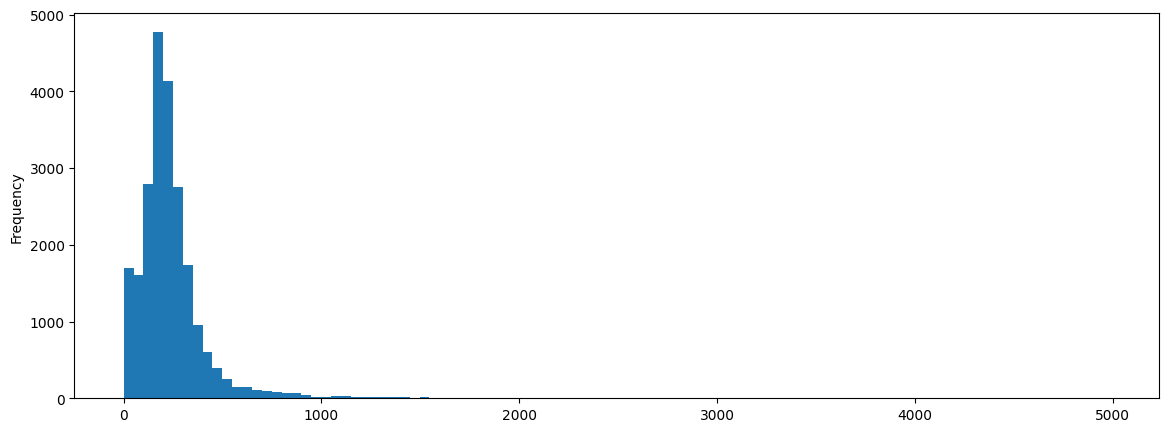

In [16]:
# Fake-news words length distribution
df['text_length'][df['label']==0].plot.hist(bins=100, figsize=(14,5))

<AxesSubplot: ylabel='Frequency'>

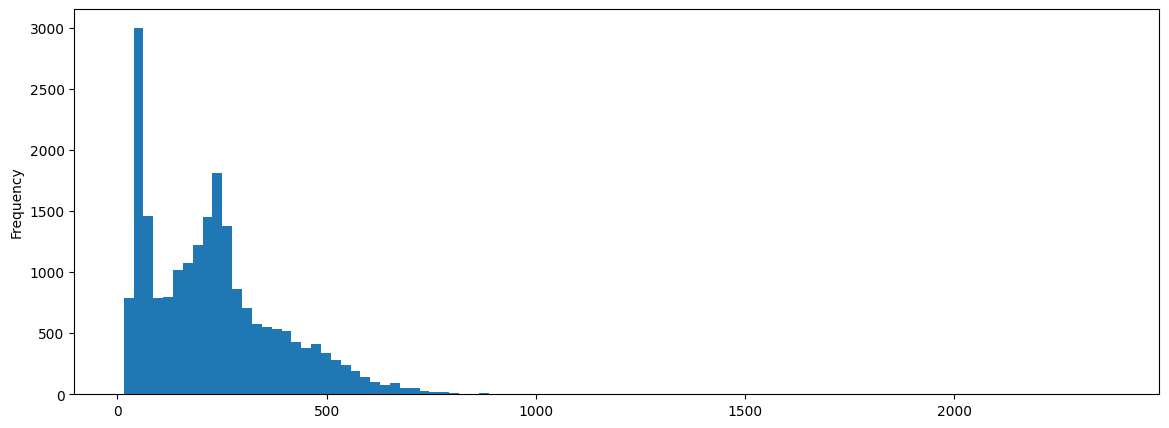

In [17]:
# Plot the True-news words length distribution
df['text_length'][df['label']==1].plot.hist(bins=100, figsize=(14,5))

In [18]:
#
True_news_text_length = df[df['text_length']<=800][df['label']==1].shape[0]*100//df[df['label']==1].shape[0]
print(True_news_text_length, 'percent True-news sentences belonging within 800 words-length')

Fake_news_text_length = df[df['text_length']<=800][df['label']==0].shape[0]*100//df[df['label']==0].shape[0]
print(Fake_news_text_length, 'percent Fake-news sentences belonging within 800 words-length')

99 percent True-news sentences belonging within 800 words-length
97 percent Fake-news sentences belonging within 800 words-length


In [20]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.0 MB/s eta 0:00:00


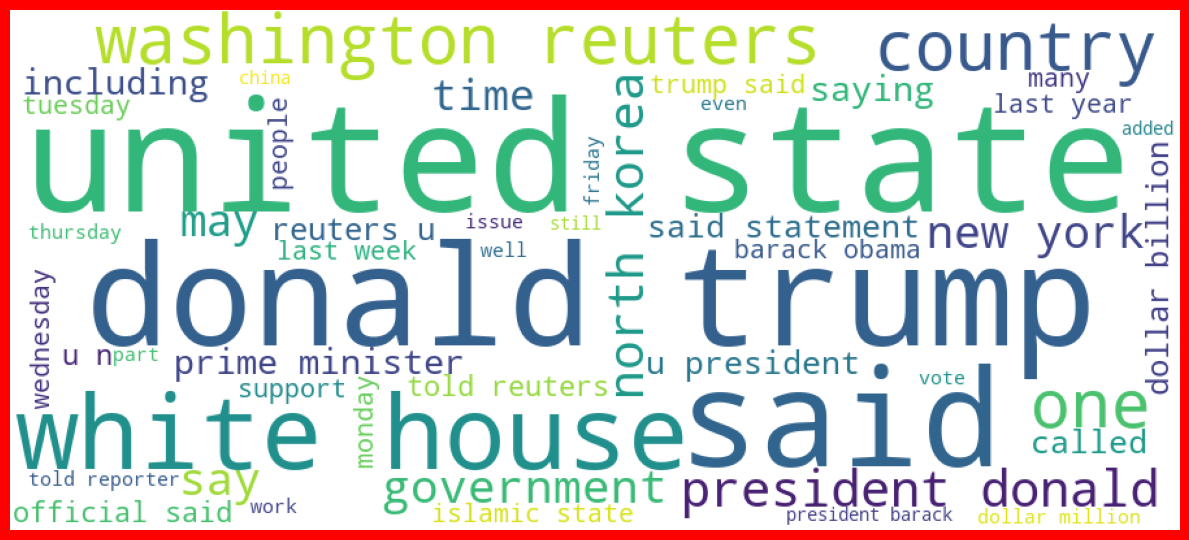

In [21]:
# GETTING SENSE OF CLOUD WORDS OF 'True_news'
from wordcloud import WordCloud

True_news= df['text'][df['label']==1]
True_news_cloud= WordCloud(width=900,height=400, background_color='white', max_words=50).generate(' '.join(True_news))

plt.figure(figsize=(12,7), facecolor='r')
plt.imshow(True_news_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

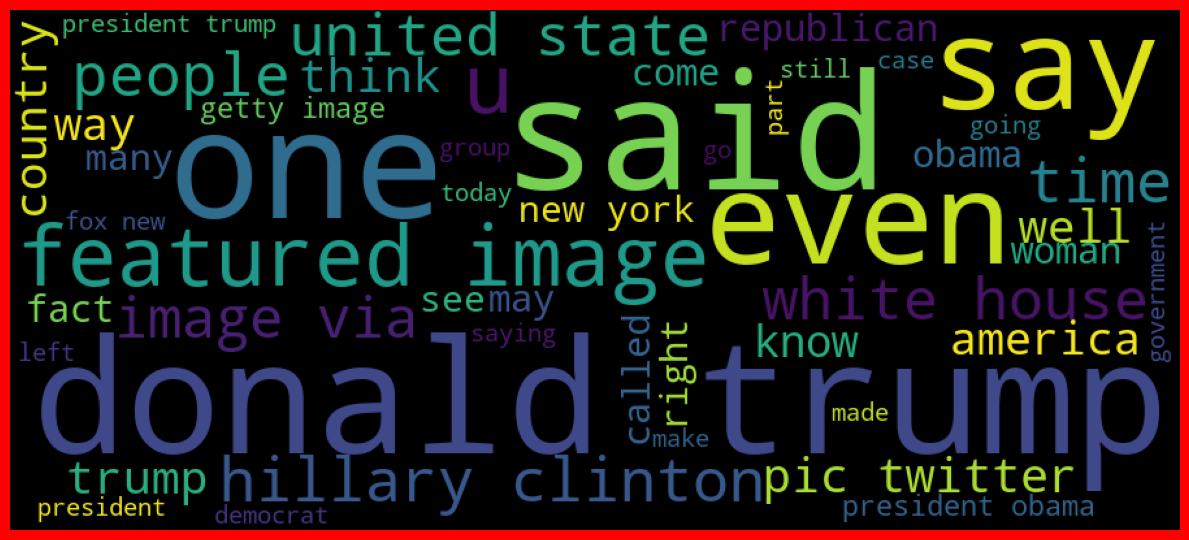

In [22]:
# GETTING SENSE OF CLOUD WORDS OF 'Fake_news'
from wordcloud import WordCloud

Fake_news= df['text'][df['label']==0]
Fake_news_cloud= WordCloud(width=900,height=400, background_color='black', max_words=50).generate(' '.join(Fake_news))

plt.figure(figsize=(12,7), facecolor='r')
plt.imshow(Fake_news_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()


# Let's Build a Model_0 using sklearn

In [23]:
# IMPORT NECESSARY LIBRARY 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [28]:
# split the dataframe into train & test 
xtrain, xtest, ytrain, ytest = train_test_split(df['text'], df['label'], test_size=0.20, random_state=59)

print(ytest[0:10])

14656    1
35445    0
19865    1
20295    0
43626    1
7875     1
31962    0
15171    0
3791     0
4811     1
Name: label, dtype: int64


In [32]:
xtrain.shape, ytest.shape

((35345,), (8837,))

In [37]:
# MAKING A FUNCTION TO GET A MODEL SCORE
from sklearn.metrics import *
def model_score(x_test, y_test, model):
    y_pred = model.predict(x_test)
    print('accuracy_score = ',accuracy_score(y_test, y_pred))
    print('precision_score = ',precision_score(y_test, y_pred))
    print('recall_score = ',recall_score(y_test, y_pred))
    print('f1_score = ',f1_score(y_test,y_pred))
    print('confusion_matrix : \n', confusion_matrix(y_test, y_pred))

In [38]:
# RANDOMFOREST_CLASSIFER MODEL
pipe_RF = Pipeline([('tf_idf', TfidfVectorizer()),('rf_c', RandomForestClassifier())])

pipe_RF.fit(xtrain, ytrain)
model_score(xtest, ytest, pipe_RF)

accuracy_score =  0.9891365848138508
precision_score =  0.988834612700628
recall_score =  0.988834612700628
f1_score =  0.988834612700628
confusion_matrix : 
 [[4490   48]
 [  48 4251]]


In [39]:
# MULTINOMIAL_NB MODEL
pipe_nb = Pipeline([('tf_idf', TfidfVectorizer()),('mnb', MultinomialNB())])

pipe_nb.fit(xtrain, ytrain)
model_score(xtest, ytest, pipe_nb)

accuracy_score =  0.935272151182528
precision_score =  0.9346862607884301
recall_score =  0.932077227262154
f1_score =  0.9333799208013044
confusion_matrix : 
 [[4258  280]
 [ 292 4007]]


In [41]:
# lOGISTIC REGRESSION MODEL7
pipe_LR = Pipeline([('tf_idf', TfidfVectorizer()),('LR', LogisticRegression())])

pipe_LR.fit(xtrain, ytrain)
model_score(xtest, ytest, pipe_LR)

accuracy_score =  0.9857417675681792
precision_score =  0.9828743346447582
recall_score =  0.9879041637590137
f1_score =  0.9853828306264502
confusion_matrix : 
 [[4464   74]
 [  52 4247]]


In [42]:
# lET'S USE CROSS VALIDATION 

from sklearn.model_selection import *
print('cross_validation with RandomForest_Classifier = ',cross_val_score(pipe_RF, xtrain, ytrain, cv=10, n_jobs=-1).mean())
print('cross_validation with LogisticRegression = ', cross_val_score(pipe_LR, xtrain, ytrain, cv=10, n_jobs=-1).mean())


cross_validation with RandomForest_Classifier =  0.9916820156427478
cross_validation with LogisticRegression =  0.9857122285112334


In [88]:
# SAVE THE RANDOMFOREST MODEL

fake_news_project = 'fake-news-project.pickle'

pickle.dump(pipe,open(fake_news_project, 'wb'))
model_0= pickle.load(open(fake_news_project, 'rb'))

# Model_1 with Tensorflow sequential api


In [58]:
##  LET'S DO TEXT VECTORIZATION  &  EMBEDDING OVER TEXT DATA
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
print(len(tokenizer.word_index)) # total unique words in vocabulary
print(tokenizer.document_count)  # show no. of rows or no. sentences 
sentences = tokenizer.texts_to_sequences(df['text'])  #generate sequences(each words in each sentence replaced by words index no.)

103174
44182


In [64]:
# visualized first sentence 
sentences[0]

[500,
 599,
 412,
 20,
 1676,
 2736,
 16866,
 1233,
 44944,
 356,
 11,
 1297,
 5927,
 3422,
 617,
 111,
 1501,
 39662,
 44945,
 41,
 56,
 4889,
 82,
 272,
 8123,
 8391,
 111,
 592,
 2225,
 2653,
 1842,
 5,
 1,
 243,
 153,
 700,
 2736,
 2074,
 8271,
 577,
 2111,
 52,
 40,
 4,
 1775,
 11047,
 243,
 2166,
 798,
 2736,
 307,
 151,
 272,
 3390,
 57,
 4615,
 1579,
 57,
 10958,
 230,
 195,
 1177,
 82,
 1019,
 5370,
 2492,
 1094,
 1335,
 50,
 2509,
 9249,
 1019,
 52,
 324,
 1698,
 81,
 153,
 245,
 312,
 885,
 332,
 21302,
 2653,
 1666,
 2229,
 243,
 153,
 337,
 1,
 36,
 500,
 599,
 412,
 1,
 2872,
 112,
 4633,
 1256,
 80,
 412,
 617]

In [59]:
# get equal sentences size length of each sentences by using pad_sequences
from keras.utils import pad_sequences
sequences = pad_sequences(sentences, padding='pre', maxlen=350) #  maxlen= making each sentence equal size 

In [60]:
# Splitting the data into Train & test
x_train,x_test, y_train,y_test = train_test_split(sequences, df['label'], test_size=0.20, random_state=42)

In [61]:
y_train.shape,  y_test.shape

((35345,), (8837,))

In [62]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [63]:
model_1 = Sequential()
model_1.add(layers.Embedding(len(tokenizer.word_index), 24,input_length = 350 ))
model_1.add(layers.LSTM(128))
model_1.add(layers.Dropout(0.20))
model_1.add(layers.Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'] )

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 350, 24)           2476176   
                                                                 
 lstm_1 (LSTM)               (None, 128)               78336     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,554,641
Trainable params: 2,554,641
Non-trainable params: 0
_________________________________________________________________


In [79]:
## fINALLY TRAINED THE MODEL_1
model_1.fit(x_train, y_train, validation_data = (x_test, y_test),epochs=8, batch_size=48)

Epoch 1/8
737/737 [==============================] - 21s 26ms/step - loss: 0.1466 - accuracy: 0.9487 - val_loss: 0.0473 - val_accuracy: 0.9857
Epoch 2/8
737/737 [==============================] - 19s 26ms/step - loss: 0.0429 - accuracy: 0.9877 - val_loss: 0.0355 - val_accuracy: 0.9898
Epoch 3/8
737/737 [==============================] - 17s 24ms/step - loss: 0.0127 - accuracy: 0.9965 - val_loss: 0.0410 - val_accuracy: 0.9873
Epoch 4/8
737/737 [==============================] - 17s 23ms/step - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.0338 - val_accuracy: 0.9929
Epoch 5/8
737/737 [==============================] - 17s 23ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0302 - val_accuracy: 0.9917
Epoch 6/8
737/737 [==============================] - 17s 23ms/step - loss: 0.0099 - accuracy: 0.9966 - val_loss: 0.0577 - val_accuracy: 0.9814
Epoch 7/8
737/737 [==============================] - 17s 23ms/step - loss: 0.0082 - accuracy: 0.9982 - val_loss: 0.0423 - val_accuracy: 0.9891

In [80]:
## PERFORMANCE METRICS & ACCURACY
y_pred = model_1.predict(x_test)

y_pred = np.where(y_pred > 0.5, 1, 0)

print('accuracy_score=', accuracy_score(y_test, y_pred))
print('precision_score=', precision_score(y_test, y_pred))
print('recall_score=', recall_score(y_test, y_pred))
print('f1_score=', f1_score(y_test, y_pred))

print('confusion_matrix \n', confusion_matrix(y_test, y_pred))

277/277 [==============================] - 4s 13ms/step
accuracy_score= 0.9920751726480245
precision_score= 0.9920582395764395
recall_score= 0.9924961377179431
f1_score= 0.9922771403353927
confusion_matrix 
 [[4266   36]
 [  34 4497]]


# let's Build a Model_2 by using TensorFlow functional api with multiple inputs 

In [47]:
# DO TEXT VECTORIZATION AND EMBEDDING OF TEXT DATA
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# 
max_length= 20  # max length OF SENTENCE will be
text_vectorizer1 = TextVectorization(max_tokens= None,
                                 #output_mode='int',
                                output_sequence_length= max_length)  # each sentence have length 35

text_vectorizer1.adapt(df['title'])
vocab_word = text_vectorizer1.get_vocabulary() # get all the unique words from our training data
print(len(vocab_word))
embedding1 = layers.Embedding(len(vocab_word), output_dim=24, input_length= 20)  # EMBEDDING LAYER

17549


In [52]:
# DO TEXT VECTORIZATION AND EMBEDDING OF SECOND INPUT DATA
text_vectorizer2 = TextVectorization(max_tokens= None,
                                output_sequence_length= 250)

text_vectorizer2.adapt(df['text'])
vocab_word = text_vectorizer2.get_vocabulary() # get all the unique words from our training data
print(len(vocab_word))

embedding2 = layers.Embedding(len(vocab_word), output_dim=24, input_length= 250)  # EMBEDDING LAYER

103032


In [24]:
df['text'].shape

(44164,)

In [40]:
##                                      DIVIDE THE DATASET INTO THREE PART= TRAIN, TEST, VALIDATION 
df1 = df.sample(8000, random_state=42)
df2 = df.drop(df1.index, axis=0).sample(1500, random_state=42)

df3 = df.drop(df1.index, axis=0)
df3 = df3.drop(df2.index, axis=0) 

x_train1 = df3['title']          # 1st input Train data
x_train2 = df3['text']           # 2nd  input Train data
y_train = df3['label']           #  train lebel data

x_test1 = df1['title']         # 1st  test data
x_test2 = df1['text']          # 2nd  test data
y_test = df1['label']

val_1 = df2['title']          # VALIDATION 1st INPUTA DATA
val_2 = df2['text']           # VALIDATION 2nd INPUTA DATA
val_label = df2['label']       # validation label data


In [41]:
print('validation data shape = ',df2.shape)
print('test data shape = ',df1.shape)
print('train data shape = ',df3.shape)

validation data shape =  (1500, 5)
test data shape =  (8000, 5)
train data shape =  (34664, 5)


In [67]:
input1 = layers.Input(shape= (1,), dtype= 'string', name='model1')
x = text_vectorizer1(input1)
x = embedding1(x)
x = layers.LSTM(120, return_sequences=True)(x)   
x = layers.Dropout(0.2)(x)
y = layers.GlobalMaxPooling1D()(x)

input2 = layers.Input(shape= (1,), dtype='string', name='model2')
x2 = text_vectorizer2(input2)
x2 = embedding2(x2)
y2 = layers.LSTM(72)(x2)

concate = layers.concatenate([y, y2])   # adding the last layers of 2 model

z = layers.Dense(64, activation='relu')(concate)
z = layers.Dropout(0.2)(z)
model_output = layers.Dense(1, 'sigmoid')(z)
model_2 = tf.keras.Model(inputs = [input1, input2], outputs = model_output, name='model_2')

In [71]:
# compile model_2
model_2.compile(loss='binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

model_2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 model1 (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization_3 (TextVect  (None, 20)          0           ['model1[0][0]']                 
 orization)                                                                                       
                                                                                                  
 embedding_3 (Embedding)        (None, 20, 24)       421176      ['text_vectorization_3[4][0]']   
                                                                                                  
 model2 (InputLayer)            [(None, 1)]          0           []                         

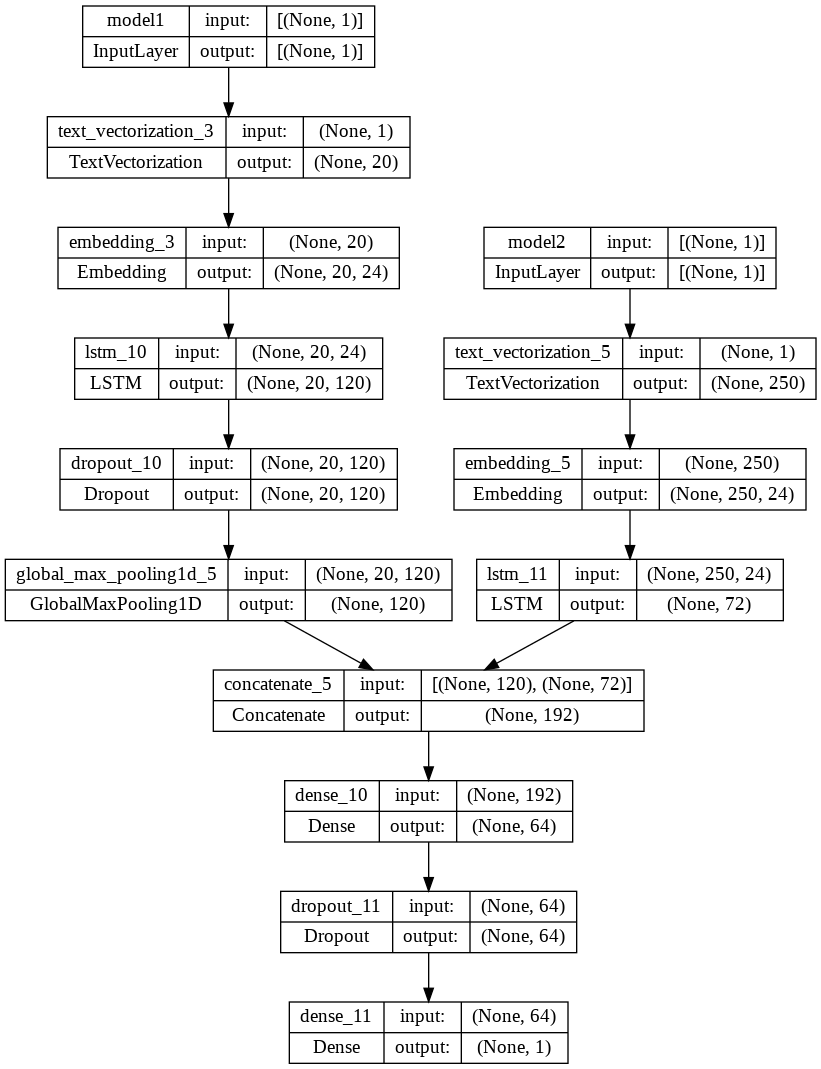

In [72]:
from keras.utils import plot_model
plot_model(model_2, show_shapes= True)

In [69]:
history = model_2.fit(x=[x_train1,x_train2], y=y_train, epochs=6, validation_data=([x_test1,x_test2], y_test), verbose=1, batch_size=64) 

Epoch 1/6
542/542 [==============================] - 16s 22ms/step - loss: 0.0231 - accuracy: 0.9949 - val_loss: 0.1139 - val_accuracy: 0.9718
Epoch 2/6
542/542 [==============================] - 11s 20ms/step - loss: 9.1583e-04 - accuracy: 0.9997 - val_loss: 0.2820 - val_accuracy: 0.9498
Epoch 3/6
542/542 [==============================] - 11s 20ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.2761 - val_accuracy: 0.9540
Epoch 4/6
542/542 [==============================] - 11s 20ms/step - loss: 5.0919e-04 - accuracy: 0.9998 - val_loss: 0.2479 - val_accuracy: 0.9578
Epoch 5/6
542/542 [==============================] - 11s 20ms/step - loss: 2.2424e-05 - accuracy: 1.0000 - val_loss: 0.2320 - val_accuracy: 0.9616
Epoch 6/6
542/542 [==============================] - 11s 20ms/step - loss: 6.4034e-06 - accuracy: 1.0000 - val_loss: 0.2502 - val_accuracy: 0.9606


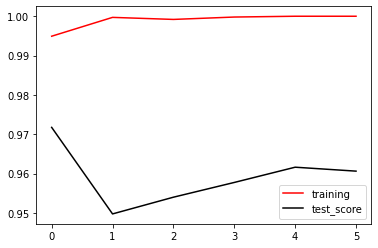

In [70]:
##
plt.plot(history.history['accuracy'], color= 'red', label= 'training')
plt.plot(history.history['val_accuracy'], color= 'k', label= 'test_score')
plt.legend()
plt.show()

In [73]:
pred = model_2.predict((x_test1,x_test2))

250/250 [==============================] - 3s 8ms/step


In [76]:
## PERFORMANCE METRICS & ACCURACY
from sklearn.metrics import *
pred = np.where(pred > 0.5, 1, 0)

print('accuracy_score=', accuracy_score(y_test, pred))
print('precision_score=', precision_score(y_test, pred))
print('recall_score=', recall_score(y_test, pred))
print('f1_score=', f1_score(y_test, pred))

accuracy_score= 0.960625
precision_score= 0.9571428571428572
recall_score= 0.9662674162796382
f1_score= 0.9616834934922759


In [77]:
## CHECKING PERFORMANCE METRICS & ACCURACY ON VALIDATION DATA

y_pred = model_2.predict((val_1, val_2))
y_pred = np.where(y_pred > 0.5, 1, 0)
print('accuracy_score=', accuracy_score(val_label, y_pred))
print('precision_score=', precision_score(val_label, y_pred))

print('recall_score=', recall_score(val_label, y_pred))
print('f1_score=', f1_score(val_label, y_pred))

# we got 95 percent accuracy on validation data

47/47 [==============================] - 1s 9ms/step
accuracy_score= 0.952
precision_score= 0.9419191919191919
recall_score= 0.966321243523316
f1_score= 0.9539641943734015


In [78]:
## Save This Functional model

model_2.save('E:\Internhip\Fake News Project\fake_news_model_2')

In [82]:
model = keras.models.load_model('E:\Internhip\Fake News Project\fake_news_model_2')
